## Today's Topics:-
* Graph
* BFS (Breadth-first search)
* DFS (Depth-first search)

# Graphs

* Connection of nodes (data points) and edges (relationship between data points)

Example of a simple graph:

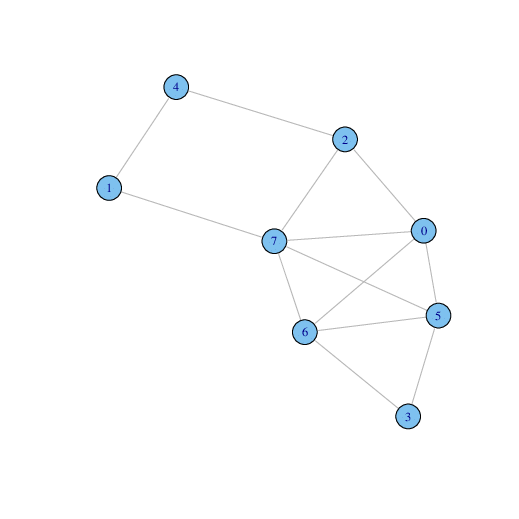

In [1]:
#Import the required packages
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print(f"networkx version: {nx.__version__}")

networkx version: 2.4


In [2]:
# Graph building function

def build_graph(nodes, edges):
    G = nx.Graph()
    G.add_nodes_from(nodes) # Add nodes from an iterable data structure
    G.add_edges_from(edges) # Add edges from an iterable data structure

    np.random.seed(458)
    plt.subplot()
    nx.draw(G, with_labels=True, font_weight='bold')
    return G

networkx.classes.graph.Graph

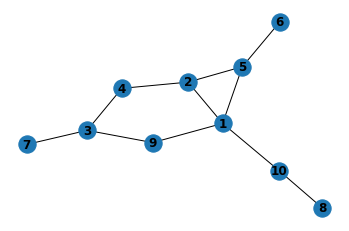

In [3]:
nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
edges = [(1,2), (3,4), (2, 4), (1, 5), (5,6), (2, 5),(1,10),(1,9),(3,7),(3,9),(10,8)]
G = build_graph(nodes, edges)
type(G)

In [4]:
G

In [5]:
adj_data = nx.adjacency_data(G)['adjacency']
adj_data

[[{'id': 2}, {'id': 5}, {'id': 10}, {'id': 9}],
 [{'id': 1}, {'id': 4}, {'id': 5}],
 [{'id': 4}, {'id': 7}, {'id': 9}],
 [{'id': 3}, {'id': 2}],
 [{'id': 1}, {'id': 6}, {'id': 2}],
 [{'id': 5}],
 [{'id': 3}],
 [{'id': 10}],
 [{'id': 1}, {'id': 3}],
 [{'id': 1}, {'id': 8}]]

In [6]:
# Adjacency list representation of graph G

def graph_to_adj_list(adj_data):
  # Using a Python dictionary to act as an adjacency list
    adj_list = {}
    key = 1
    for line in adj_data:
        values = [str(l['id']) for l in line]
#         print(values)
        adj_list[str(key)] = values
        key += 1
    return adj_list

In [7]:
adj_list = graph_to_adj_list(adj_data)
adj_list

{'1': ['2', '5', '10', '9'],
 '2': ['1', '4', '5'],
 '3': ['4', '7', '9'],
 '4': ['3', '2'],
 '5': ['1', '6', '2'],
 '6': ['5'],
 '7': ['3'],
 '8': ['10'],
 '9': ['1', '3'],
 '10': ['1', '8']}

# BFS

A breadth-first search (BFS) is another technique for traversing a finite graph. BFS visits the sibling vertices before visiting the child vertices, and a queue is used in the search process. This algorithm is often used to find the shortest path from one vertex to another.


**Visualization of BFS**:- https://www.cs.usfca.edu/~galles/visualization/BFS.html <br>


**Pseudocode**:

*   *Input*: A graph *G* and a vertex *v* of *G*.
*   *Output*: The closest vertex to *v* satisfying some conditions, or null if no such vertex exists.

```
procedure BFS(G, v) is
    create a queue Q
    enqueue v onto Q
    mark v
    while Q is not empty do
        w ← Q.dequeue()
        if w is what we are looking for then
            return w
        for all edges e in G.adjacentEdges(w) do
            x ← G.adjacentVertex(w, e)
            if x is not marked then
                mark x
                enqueue x onto Q
    return null
```

**Refrence**:- https://en.wikipedia.org/wiki/Graph_traversal

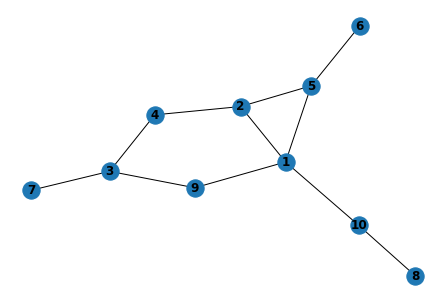

In [8]:
np.random.seed(458)
nx.draw(G, with_labels=True, font_weight='bold')

In [9]:
def bfs(visited, graph, node):
  node = str(node)
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
        
    
    
visited = []   # List to keep track of visited nodes.
queue = []     # Initialize a queue

print(bfs(visited, adj_list, 2))

2 1 4 5 10 9 3 6 8 7 None


## Application of BFS:-

* To find the shortest path.
* Social Networking Websites.
* GPS Navigation System. <br>
And many more...<br>
Refrence:- https://www.geeksforgeeks.org/applications-of-breadth-first-traversal/

# DFS (Depth First Search)

A depth-first search (DFS) is an algorithm for traversing a **finite** graph. DFS traverses the **depth** of any particular path before exploring its breadth. A **stack** (often the program's call stack via **recursion**) is generally used when implementing the algorithm. Key steps of this algorithm are:

*   Begins with a chosen "**root**" node.
*   Iteratively transitions from the current node to an adjacent, **unvisited** node, till no new node is found for transition.
*   Backtracks along previously visited nodes, until it finds a node connected to unvisited nodes.
*   Proceeds down the new path similarly, backtracking as it encounters dead-ends.
*   Ends when it has backtracked past the original "root" node from the very first step.


**Visualization of DFS**: https://www.cs.usfca.edu/~galles/visualization/DFS.html

**Pseudocode**:

*   *Input*: A graph *G* and a node *v* of *G*.
*   *Output*: A labeling of the edges in the connected component of *v* as discovery edges and back edges.

```
procedure DFS(G, v) is
    label v as explored
    for all edges e in G.incidentEdges(v) do
        if edge e is unexplored then
            w ← G.adjacentNode(v, e)
            if node w is unexplored then
                label e as a discovered edge
                recursively call DFS(G, w)
            else
                label e as a back edge
```

Source: https://en.wikipedia.org/wiki/Graph_traversal

Reference: https://www.educative.io/edpresso/how-to-implement-depth-first-search-in-python


In [10]:
# DFS function

def dfs(visited, graph, node):
  node = str(node)
  if node not in visited:
    print(node, end = " ")
    visited.add(node)
    for neighbour in graph[node]:
      dfs(visited, graph, neighbour)
    
    
visited = set() # Set to keep track of visited nodes.
dfs(visited, adj_list, 6)

6 5 1 2 4 3 7 9 10 8 

## Applications of DFS

*   Topological Sorting
*   Detect cycles in graphs
*   Find connected components
*   Solving maze type problems

Refrence:- https://www.geeksforgeeks.org/applications-of-depth-first-search/